In [ ]:
# !pip install numpy pandas sklearn
# !pip install nltk

In [34]:
import numpy as np
import pandas as pd
import itertools
import pickle
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset 7K

In [39]:
#Read the data
df_train=pd.read_csv('news.csv')
# df_train=pd.read_csv('Data/train.csv')  #Best Result using this dataset



#Get shape and head
df_train.shape
df_train.head()

df_train.loc[(df_train['label'] == 1) , ['label']] = 'FAKE'
df_train.loc[(df_train['label'] == 0) , ['label']] = 'REAL'
print("Fake data ",len(df_train[df_train['label']=='FAKE']))
print("Real data ",len(df_train[df_train['label']=='REAL']))

Fake data  3164
Real data  3171


# Dataset 20K

In [45]:
#Read the data
# df_train=pd.read_csv('news.csv')
df_train=pd.read_csv('Data/train.csv')  #Best Result using this dataset

df_train.shape
df_train.head()

df_train.loc[(df_train['label'] == 1) , ['label']] = 'FAKE'
df_train.loc[(df_train['label'] == 0) , ['label']] = 'REAL'
print("Fake data ",len(df_train[df_train['label']=='FAKE']))
print("Real data ",len(df_train[df_train['label']=='REAL']))


Fake data  10413
Real data  10387


# Dataset 75K

In [44]:
#Read the data
df_test=pd.read_csv('news.csv')
df_train=pd.read_csv('Data/combined_news_data_processed.csv')  #Best Result using this dataset



#Get shape and head
df_train.shape
df_train.head()

# df_train.shape
# print(len(df_train))
# df_test=pd.DataFrame(df_test)

# data = df_train

df_train.loc[(df_train['label'] == 0) , ['label']] = 'FAKE'
df_train.loc[(df_train['label'] == 1) , ['label']] = 'REAL'
print("Fake data ",len(df_train[df_train['label']=='FAKE']))
print("Real data ",len(df_train[df_train['label']=='REAL']))

Fake data  37043
Real data  36969


In [46]:
# - Get the labels
labels=df_train.label
labels.head()

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [47]:
# - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df_train['text'].values.astype('str'), labels, test_size=0.20,random_state=6)
# x_train,x_test,y_train,y_test=train_test_split(df_test['Body'], labels, test_size=0.2, random_state=7)

# print(len(x_train),len(x_test))


# Lemmatizer

In [48]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize          
nltk.download('punkt')
nltk.download('wordnet')
class LemmaTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

In [49]:
# - Initialize a TfidfVectorizer
tokenizer=LemmaTokenizer()

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 

tfidf_test=tfidf_vectorizer.transform(x_test)


In [50]:
# - Initialize a PassiveAggressiveClassifier
LR_Model=PassiveAggressiveClassifier(max_iter=50)
LR_Model.fit(tfidf_train,y_train)

# - Predict on the test set and calculate accuracy

# pac.save("model")
y_pred=LR_Model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.61%


# Model save

In [51]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)
    
pickle.dump(tfidf_vectorizer, open("vectorizer.pickle", "wb"))
print(Pkl_Filename)

Pickle_RL_Model.pkl


# Load Model

In [52]:
# Load the Model back from file
Pkl_Filename = "Pickle_RL_Model.pkl"  


with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

# Pickled_LR_Model
vectorizer = pickle.load(open("vectorizer.pickle", 'rb'))
# vectorizer
f = open("demofile.txt", "r")
# print(f.read())
tfidf_test_one=vectorizer.transform([f.read()])
new_predit=Pickled_LR_Model.predict(tfidf_test_one)

print(new_predit)

['REAL']


In [53]:
y_pred=Pickled_LR_Model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.61%


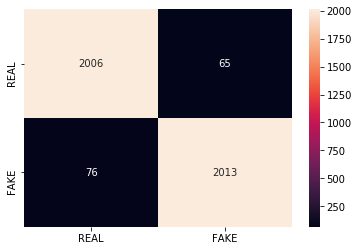

In [54]:
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["REAL",'FAKE']],
                  columns = [i for i in ["REAL",'FAKE']])
sns.heatmap(df_cm, annot=True,fmt="2g")

In [55]:
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.97      2071
        REAL       0.97      0.96      0.97      2089

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [56]:
f = open("demofile.txt", "r")
# print(f.read())
tfidf_test_one=tfidf_vectorizer.transform([f.read()])
new_predit=LR_Model.predict(tfidf_test_one)

print(new_predit)

['REAL']
